<font color='red'>Reviews header table extracted from Metacritic:</font>

In [6]:
import numpy as np
import langdetect
import matplotlib.pyplot as plt
import pandas as pd
import re
from utils import *
#Reading Data
df = pd.read_csv('ratings.csv', lineterminator='\n')
df.head()

,Name,Date,Rating,Review
0,nyix01,"Jul 11, 2016",4.0,20 Hours Played. Always Online. I don't mind...
1,JJthis,"May 6, 2016",3.0,With the inclusion of Manual Transmission and...
2,SpyderSeven,"Mar 24, 2016",6.0,Always online. Nothing quite like latency in ...
3,szogyenyi,"Jul 17, 2016",5.0,I didn't have high expectations about this ga...
4,arislaf,"Aug 20, 2016",0.0,It is always online. Support the war versus t...


<font color='red'>Reviews Analysis by grade:</font>

In [7]:
# Split data by reviews types
df = df[['Rating', "Review"]]
pos = print(f'Positive rating >= 7:  {len(df.loc[df["Rating"] >= 7])}')
print(f'Negative rating <= 5: {len(df.loc[df["Rating"] <= 5])}')
print(f'5 < Neutral rating < 7:  {len(df.loc[(df["Rating"] > 5) & (df["Rating"] < 7)])}')

Positive rating >= 7:  38
Negative rating <= 5: 58
5 < Neutral rating < 7:  8


<font color='red'>Reviews cleaned sample size:</font>

In [8]:
#Excluding big reviews (more than 3.000 char)
long_reviews = df.loc[df['Review'].str.len() > 3000].index
df.drop(long_reviews, inplace=True)
print(len(df.loc[df["Rating"] < 100]))

96


<font color='red'>Most repeated positive words reviews</font>

('game', 74) ('great', 22) ('good', 21) ('NFS', 20) ('Need', 16) 

('car', 15) ('underground', 14) ('nfs', 12) ('graphics', 11) ('bad', 11) 

('story', 11) ('amazing', 10) ('settings', 10) ('Speed', 10) ('people', 10) 

('played', 10) ('old', 10) ('cars', 9) ('new', 9) ('racing', 9) 

('10', 9) ('customization', 8) ('true', 8) ('speed', 7) ('play', 7) 

('series', 7) ('online', 7) ('max', 6) ('games.', 6) ('feels', 6) 



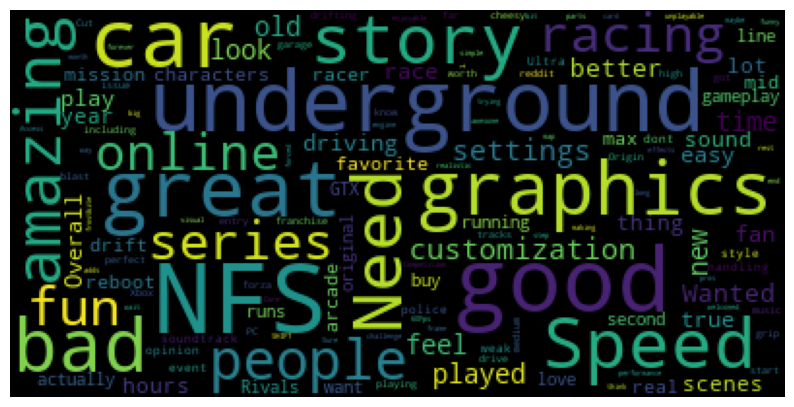

In [9]:

#Analyszing data of positive reviews
positive_reviews=df[df['Rating']>=7]
russian_characters = re.compile(r"[\u0400-\u052F]")
cleaned_reviews = []
#Cleaning data so there is only Enlgish
for review in positive_reviews['Review']:
    try:
        lang = langdetect.detect(review)
    except:
        continue 
    if lang == "en":
      cleaned_reviews.append(review)
from wordcloud import WordCloud, STOPWORDS
words = []
#Splitting reviews strings in tokes(words)
for value in cleaned_reviews:
    for word in re.split(" ", value):
        if word:
            words.append(word)
#Getting a dictionary with all reviews words
repeated_words = word_count(words)
#Opening a file with words that are not important for analysis
entries =  set(open('words.txt').read().split())
#removing all prepositions, pronounms and words that should be analysed
entries_to_remove(entries, repeated_words)
repeated_words = (sorted(repeated_words.items(),reverse=True, key=lambda item: item[1]))
#Priting list with the most repeated words
rows = int(len(repeated_words)/5)
for i in range(6):
    sublist = repeated_words[i*5 : i*5 + 5]
    sublist.append("\n")
    print(*sublist)
#Cloud with positive reviews words
word_cloud(cleaned_reviews,'black','Most Used Words')

<font color='red'>Most repeated negative words reviews</font>

('game', 119) ('play', 34) ('car', 27) ('time', 26) ('online', 26) 

('cars', 25) ('****', 25) ('good', 22) ('driving', 21) ('race', 18) 

('EA', 17) ('NFS', 15) ('actually', 15) ('graphics', 14) ('AI', 14) 

('annoying', 14) ('ONLINE', 14) ('racing', 14) ('races', 13) ('fun', 13) 

('bad', 13) ('ALWAYS', 12) ('people', 11) ('buying', 11) ('terrible', 11) 

('story', 11) ('controls', 11) ('world', 11) ('worst', 10) ('played', 10) 



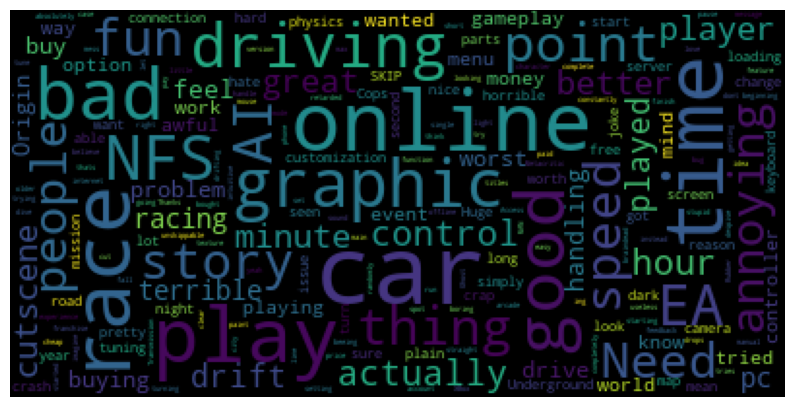

In [10]:
#Analyszing data of negative reviews
negative_reviews=df[df['Rating']<=5]
russian_characters = re.compile(r"[\u0400-\u052F]")
cleaned_reviews = []
#Cleaning data so there is only Enlgish
for review in negative_reviews['Review']:
    try:
        lang = langdetect.detect(review)
    except:
        continue 
    if lang == "en":
      cleaned_reviews.append(review)
from wordcloud import WordCloud, STOPWORDS
words = []
#Splitting reviews strings in tokes(words)
for value in cleaned_reviews:
    for word in re.split(" ", value):
        if word:
            words.append(word)
#Getting a dictionary with all reviews words
repeated_words = word_count(words)
#Opening a file with words that are not important for analysis
entries =  set(open('words.txt').read().split())
#removing all prepositions, pronounms and words that should be analysed
entries_to_remove(entries, repeated_words)
repeated_words = (sorted(repeated_words.items(),reverse=True, key=lambda item: item[1]))
#Priting list with the most repeated words
rows = int(len(repeated_words)/5)
for i in range(6):
    sublist = repeated_words[i*5 : i*5 + 5]
    sublist.append("\n")
    print(*sublist)
#Cloud with positive reviews words
word_cloud(cleaned_reviews,'black','Most Used Words')